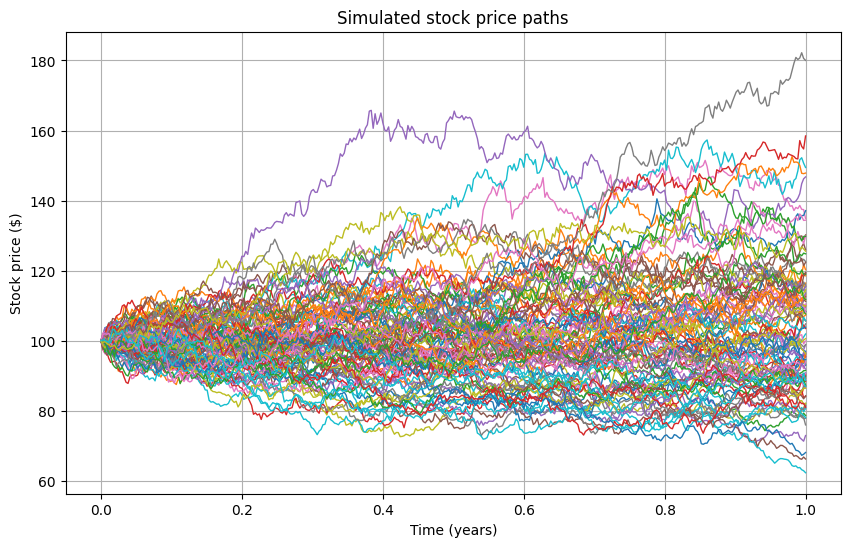

In [ ]:
import numpy as np
from numpy import exp, sqrt, log, mean,std
import matplotlib.pyplot as plt
from scipy.stats import norm

S_0 = 100
vol = 0.2
drift = 0.1
T = 1
r = 0.05
K = 100

N = 365
dt = T/N

def stock_price_path():
    path = [S_0]
    for i in range(0, N):
        Z = np.random.standard_normal()
        path.append(path[i] * exp((r - vol**2 / 2) * dt + vol * sqrt(dt) * Z))
    return path

M = 100
plt.figure(figsize=(10, 6))

for _ in range(M):
    path = stock_price_path()
    t = np.linspace(0, T, N + 1)
    plt.plot(t, path, linewidth=1)

plt.title(f'Simulated stock price paths')
plt.xlabel('Time (years)')
plt.ylabel('Stock price ($)')
plt.grid(True)
plt.show()

def european_call():
    return max(path - K,0)

def european_put():
    return max(K-path,0)

def MC_price():
    payoff_call = []
    payoff_put = []
    for _ in range(n):
        payoff_call .append(european_call(stock_price_path()))
        payoff_put .append(european_put(stock_price_path()))
    return exp(-r*T)*[mean(payoff_call), mean(payoff_put)]

def d_1():   
    return (log(path/K) + (r + vol**2 / 2)*T)/(vol * sqrt(T))

def d_2():
    return d_1() - vol * sqrt(T)

def phi(x):
    return norm.cdf(x)

def BS_european_price():
    return path*phi(d_1()) - K * exp(-r*T)*phi(d_2())

def numerical_parity():
    return european_call - european_put - path + K * exp(-r*T)

numerical_parity()